<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Analysis_of_University_Admissions_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of University Admissions Data
> Project team details:
> 1. Arnav Barman (102053038)
> 1. Aryan Baluja (102003375)

We have taken the [University admissions dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university) from kaggle and after it's analysis, we will predict the probability of admission of a student in particular university based on various parameters.

The different entities or parameters in the dataset are -
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )
---

## Loading the dataset

Importing Libraries

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

Loading dataset

In [ ]:
adm = pd.read_csv("/content/adm_data.csv")
print("Printing the first and last 5 rows of the data")
adm.head()

Printing the first and last 5 rows of the data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
adm.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


## About the dataset

In [ ]:
print("Printing out the description of data")
print("___________________________________________________")
adm.describe()

Printing out the description of data
___________________________________________________


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
print("Printing out the info of dataset")
print("___________________________________________________")
adm.info()

Printing out the info of dataset
___________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
___________________________________________________


In [ ]:
adm.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
print("Printing out the datatypes of columns:")
print("___________________________________________________")
adm.dtypes

Printing out the datatypes of columns:
___________________________________________________


Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
print("Printing out the shape of dataset:")
adm.shape

Printing out the shape of dataset:


(400, 9)

## Preprocessing of data

We now check how many NULL values we have in the dataset.

In [ ]:
adm.isnull().values.any()

False

In [ ]:
adm.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

From the above analysis, we found out that our data has no null values.

The Serial No. data is also of no significance as it is unique descriptor for all the instances in the dataset.

## Data Visualisation

In [ ]:
adm=adm.drop(['Serial No.'],axis=1)

In [ ]:
adm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


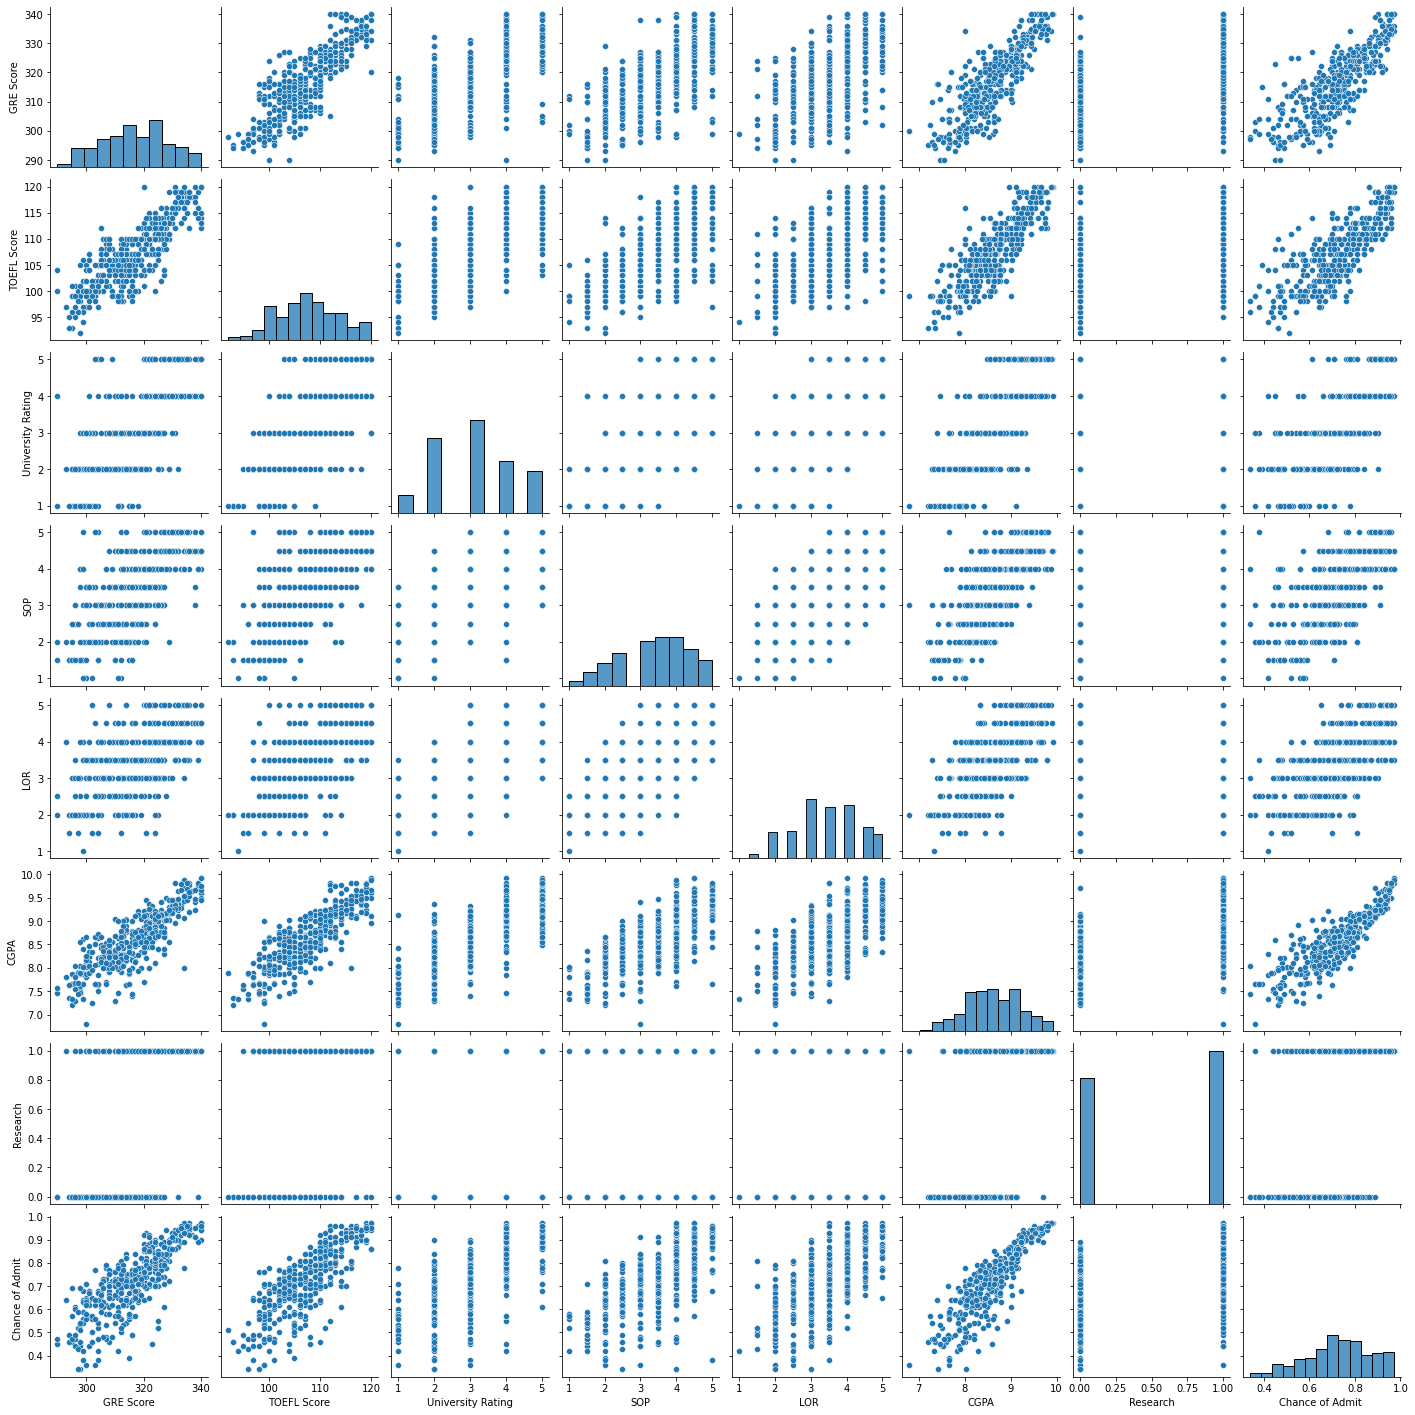

In [ ]:
sns.pairplot(adm)
plt.show()

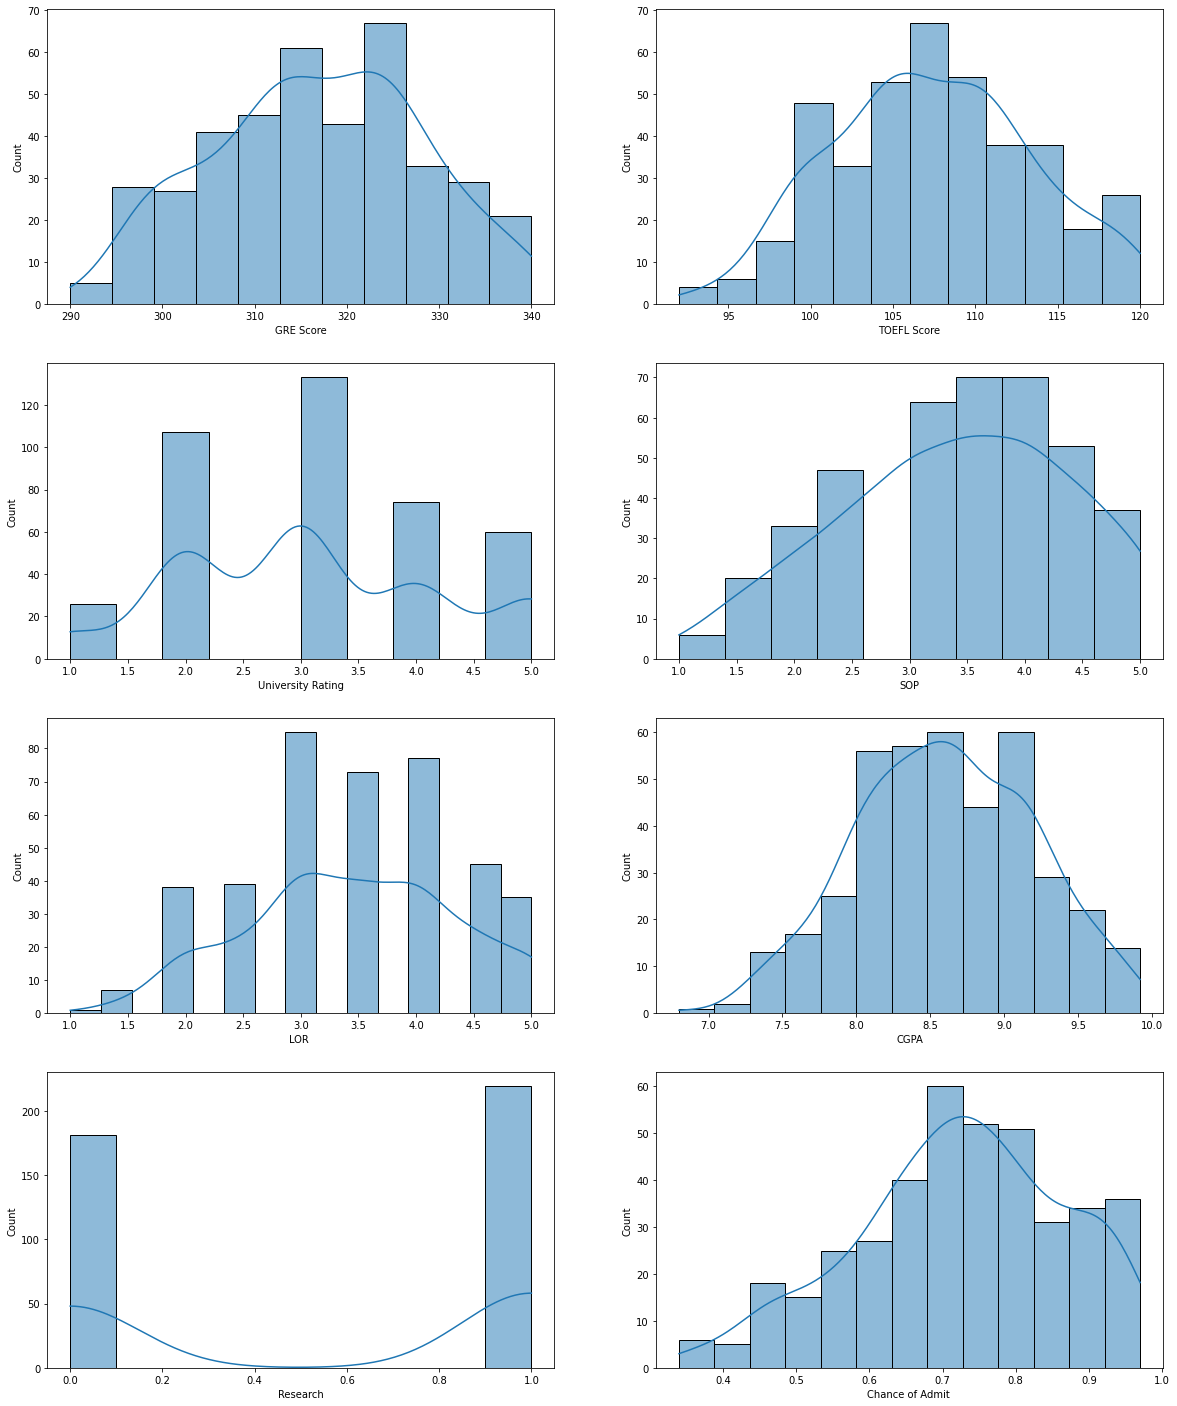

In [ ]:
plt.figure(figsize=(20,25))
i = 0
for item in adm.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.histplot(adm[item],kde=True)
plt.show()

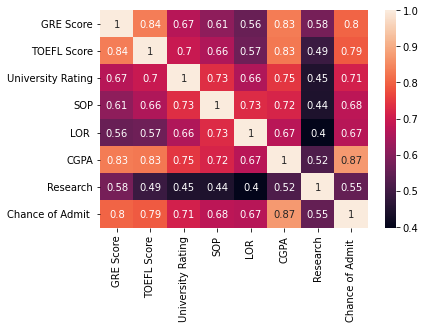

In [ ]:
print()
adm.corr()
sns.heatmap(adm.corr(),annot=True)

In [ ]:
#sns.countplot(x=adm['University Rating'],hue=adm['Research'])

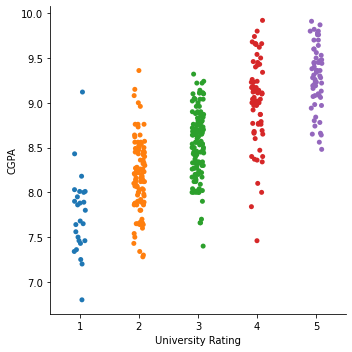

In [ ]:
sns.catplot(y="CGPA", x="University Rating", data=adm) #can add hue
plt.show()

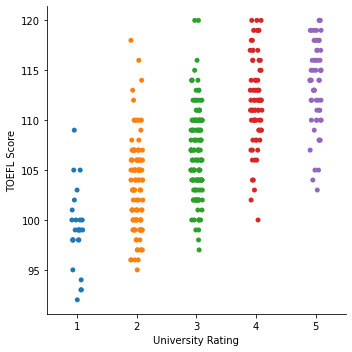

In [ ]:
sns.catplot(y="TOEFL Score", x="University Rating", data=adm) #can add hue
plt.show()

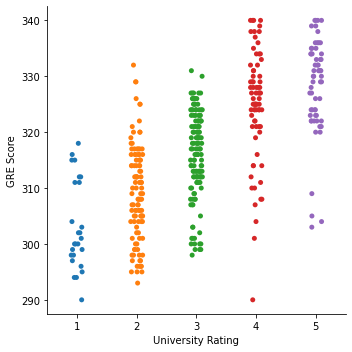

In [ ]:
sns.catplot(y="GRE Score", x="University Rating",data=adm) #can add hue
plt.show()

### GRE Score Analysis:

In [ ]:
adm=adm.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore','TOEFL Score':'TOEFLScore','LOR ':'LOR','University Rating':'UniversityRating','Chance of Admit ':'ChanceOfAdmit'})

In [ ]:
print("Max GRE Score :",max(adm.GREScore))
print("Min GRE Score :",min(adm.GREScore))

Max GRE Score : 340
Min GRE Score : 290


In [ ]:
maxvalues=adm[adm.GREScore>=325]
meanvalues=adm[(adm.GREScore>305)&(adm.GREScore<325)]
minvalues=adm[(adm.GREScore<=305)]

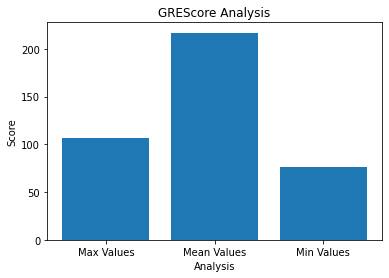

In [ ]:
y=np.array([len(maxvalues),len(meanvalues),len(minvalues)])
x=['Max Values','Mean Values','Min Values']
plt.bar(x,y)
plt.title('GREScore Analysis')
plt.xlabel('Analysis')
plt.ylabel('Score')
plt.show()

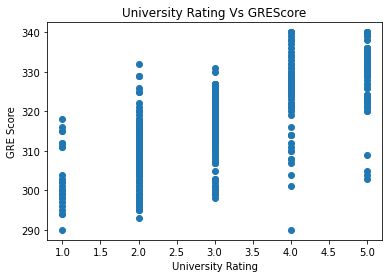

In [ ]:
plt.scatter(x='UniversityRating',y='GREScore',data=adm)
plt.xlabel('University Rating')
plt.ylabel('GRE Score')
plt.title('University Rating Vs GREScore')
plt.show()

### TOEFL Score Analysis:

In [ ]:
print("Min TOEFLScore :",min(adm.TOEFLScore))
print("Max TOEFLScore :",max(adm.TOEFLScore))

Min TOEFLScore : 92
Max TOEFLScore : 120


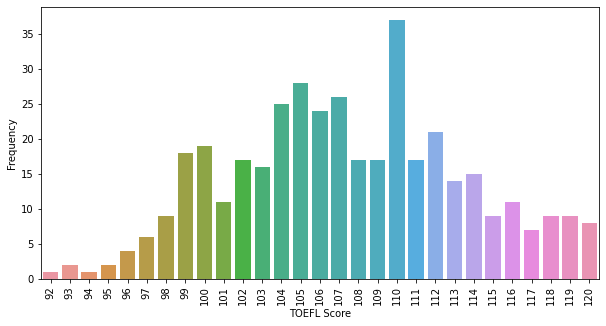

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=adm.TOEFLScore.value_counts().index,y=adm.TOEFLScore.value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')
plt.show()

### University Rating Analysis:

In [ ]:
adm.UniversityRating.value_counts()

3    133
2    107
4     74
5     60
1     26
Name: UniversityRating, dtype: int64

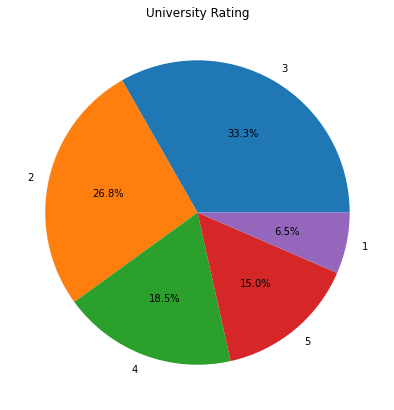

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(adm.UniversityRating.value_counts().values,labels=adm.UniversityRating.value_counts().index,autopct='%1.1f%%')
plt.title('University Rating')
plt.show()

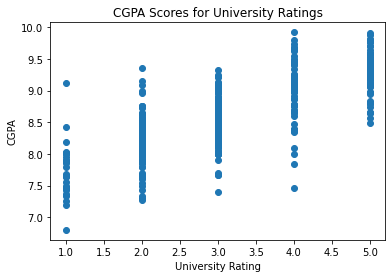

In [ ]:
plt.scatter(adm.UniversityRating,adm.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

In [ ]:
adm.groupby('UniversityRating')[['SOP','LOR','CGPA']].mean()

,SOP,LOR,CGPA
UniversityRating,,,
1,1.884615,2.211538,7.745769
2,2.705607,2.925234,8.183738
3,3.364662,3.402256,8.552256
4,4.108108,4.006757,9.021622
5,4.500000,4.358333,9.291167


### CGPA Analysis

In [ ]:
print("Min CGPA Score :",min(adm.CGPA))
print("Max CGPA Score :",max(adm.CGPA))

Min CGPA Score : 6.8
Max CGPA Score : 9.92


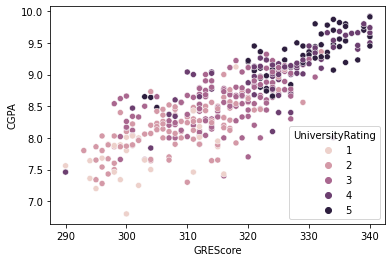

In [ ]:
sns.scatterplot(y="CGPA", x="GREScore",hue="UniversityRating",data=adm)
plt.show()

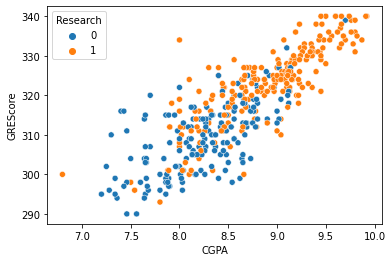

In [ ]:
sns.scatterplot(x="CGPA", y="GREScore",hue="Research", data=adm)
plt.show()

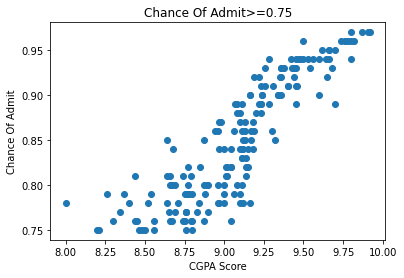

In [ ]:
plt.scatter(x=adm[adm.ChanceOfAdmit >=0.75].CGPA,y=adm[adm.ChanceOfAdmit >=0.75].ChanceOfAdmit)
plt.xlabel("CGPA Score")
plt.ylabel("Chance Of Admit")
plt.title("Chance Of Admit>=0.75")
plt.show()

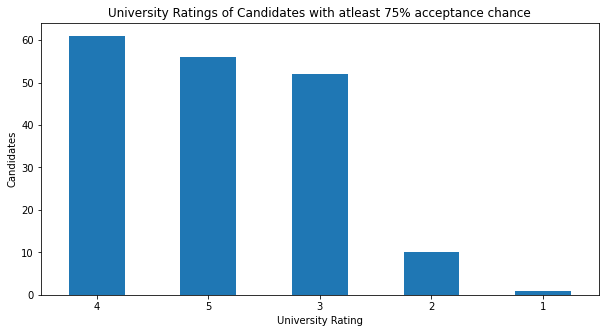

In [ ]:
s = adm[adm["ChanceOfAdmit"] >= 0.75]["UniversityRating"].value_counts()
plt.title("University Ratings of Candidates with atleast 75% acceptance chance")
s.plot(kind='bar',figsize=(10, 5))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.xticks(rotation=360)
plt.show()

Insights from Visualizations

To do: 
- Apply PCA
- Make a model
- Train and Test
- Diff models and analysis
- Compare models
- Result